In [37]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress
import time

In [17]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)#combines arrays into a tuple by index
lat_lngs#tuple that can be accessed by 0 (latitude) and 1 (longitude)

In [18]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
#after you do this the tuple lat_lngs can no longer be accessed!

In [19]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [20]:
#In a new cell, create a for loop that will do the following:

#Iterate through the coordinates' list.
#Use citipy.nearest_city() and inside the parentheses of nearest_city(), add the latitude and longitude in this format: coordinate[0], coordinate[1].
#To print the city name, chain the city_name to the nearest_city() function.
#To print the country name, chain the country_code to the nearest_city() function.

# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)


dwarka in
morropon pe
lubaczow pl
ponta do sol cv
albany au
comodoro rivadavia ar
bethel us
isangel vu
taolanaro mg
victoria sc
tautira pf
port hardy ca
cape town za
kudahuvadhoo mv
buraydah sa
inirida co
camopi gf
castro cl
punta arenas cl
namatanai pg
marang my
sibolga id
barentsburg sj
arraial do cabo br
ushuaia ar
fortuna us
rikitea pf
bluff nz
cabo san lucas mx
evensk ru
sentyabrskiy ru
cherskiy ru
ushuaia ar
svetlaya ru
barrow us
butaritari ki
olga ru
punta arenas cl
zwolle nl
novyye burasy ru
rikitea pf
kapaa us
vaini to
punta arenas cl
hermanus za
saldanha za
karachi pk
tiznit ma
tremedal br
lavrentiya ru
tirodi in
barrow us
mount gambier au
hobart au
esperance au
namibe ao
yerbogachen ru
cidreira br
attawapiskat ca
albany au
cidreira br
sept-iles ca
monroe us
nakamura jp
taolanaro mg
busselton au
panaba mx
illoqqortoormiut gl
surt ly
souillac mu
port elizabeth za
cidreira br
atuona pf
norwich gb
rizhao cn
evensk ru
ozark us
lokot ru
lasa cn
east london za
belushya guba ru
la r

hasaki jp
busselton au
codrington ag
ushuaia ar
penzance gb
kodiak us
kapaa us
coquimbo cl
ushuaia ar
ushuaia ar
vila velha br
paamiut gl
bilibino ru
tasiilaq gl
punta arenas cl
coquimbo cl
arraial do cabo br
maceio br
punta arenas cl
gasa bt
vao nc
atuona pf
longyearbyen sj
codrington ag
lebu cl
punta arenas cl
sioux lookout ca
sumbawa id
pasan in
freetown ag
louisbourg ca
mar del plata ar
ushuaia ar
castro cl
dujuma so
ternate id
new norfolk au
kapaa us
stoyba ru
albany au
muli mv
belushya guba ru
taolanaro mg
yuryuzan ru
dhaka in
port alfred za
chuy uy
klaksvik fo
noumea nc
atuona pf
bathsheba bb
taolanaro mg
barrow us
mar del plata ar
bluff nz
marfino ru
jinchengjiang cn
tuktoyaktuk ca
nikolskoye ru
georgetown sh
ponta do sol cv
ahipara nz
kloulklubed pw
pak phanang th
nara ml
faanui pf
albany au
georgetown sh
arraial do cabo br
souillac mu
rikitea pf
vardo no
tignere cm
pijijiapan mx
qui nhon vn
qaanaaq gl
rikitea pf
san lorenzo bo
east london za
san patricio mx
ushuaia ar
bondo c

In [21]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

638

In [22]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in our list.
##this wont work. adds the index not the city.
#for i in range(len(cities)):
 #   # Group cities in sets of 50 for logging purposes.
  #  if (i % 50 == 0 and i >= 50):
   #     set_count += 1
    #    record_count = 1
    # Create endpoint URL with each city.
    #city_url = url + "&q=" + cities[i] #this wont work. adds the index not the city.
#use the enumerate function to get the name
for index,city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes.
    if (index % 50 == 0 and index >= 50):
        set_count += 1
        record_count = 1
    
    #Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")# this will remove spaces in the city name.
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dwarka
Processing Record 2 of Set 1 | morropon
Processing Record 3 of Set 1 | lubaczow
Processing Record 4 of Set 1 | ponta do sol
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | comodoro rivadavia
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | isangel
Processing Record 9 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 10 of Set 1 | victoria
Processing Record 11 of Set 1 | tautira
Processing Record 12 of Set 1 | port hardy
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | kudahuvadhoo
Processing Record 15 of Set 1 | buraydah
Processing Record 16 of Set 1 | inirida
Processing Record 17 of Set 1 | camopi
Processing Record 18 of Set 1 | castro
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | namatanai
Processing Record 21 of Set 1 | marang
Processing Record 22 of Set 1 | sibolga
Processi

Processing Record 38 of Set 4 | bambous virieux
Processing Record 39 of Set 4 | uglovskoye
Processing Record 40 of Set 4 | norman wells
Processing Record 41 of Set 4 | katsuura
Processing Record 42 of Set 4 | kruisfontein
Processing Record 43 of Set 4 | panalingaan
Processing Record 44 of Set 4 | adrar
Processing Record 45 of Set 4 | sao felix do xingu
Processing Record 46 of Set 4 | tiksi
Processing Record 47 of Set 4 | morro bay
Processing Record 48 of Set 4 | vila velha
Processing Record 49 of Set 4 | waynesboro
Processing Record 50 of Set 4 | bull savanna
Processing Record 1 of Set 5 | mackay
Processing Record 2 of Set 5 | qaanaaq
Processing Record 3 of Set 5 | necochea
Processing Record 4 of Set 5 | saskylakh
Processing Record 5 of Set 5 | fairbanks
Processing Record 6 of Set 5 | nouakchott
Processing Record 7 of Set 5 | timra
Processing Record 8 of Set 5 | tasbuget
City not found. Skipping...
Processing Record 9 of Set 5 | puchezh
Processing Record 10 of Set 5 | airai
Processing 

Processing Record 28 of Set 8 | asau
Processing Record 29 of Set 8 | kashary
Processing Record 30 of Set 8 | tuatapere
Processing Record 31 of Set 8 | pringsewu
Processing Record 32 of Set 8 | lompoc
Processing Record 33 of Set 8 | sao lourenco do oeste
Processing Record 34 of Set 8 | padang
Processing Record 35 of Set 8 | brae
Processing Record 36 of Set 8 | saint george
Processing Record 37 of Set 8 | murgab
Processing Record 38 of Set 8 | faya
Processing Record 39 of Set 8 | caranavi
Processing Record 40 of Set 8 | we
City not found. Skipping...
Processing Record 41 of Set 8 | yumen
Processing Record 42 of Set 8 | laguna
Processing Record 43 of Set 8 | udachnyy
Processing Record 44 of Set 8 | srednekolymsk
Processing Record 45 of Set 8 | acapulco
Processing Record 46 of Set 8 | gravdal
Processing Record 47 of Set 8 | yuzhne
Processing Record 48 of Set 8 | soyo
Processing Record 49 of Set 8 | ariquemes
Processing Record 50 of Set 8 | richards bay
Processing Record 1 of Set 9 | verkho

Processing Record 16 of Set 12 | tailai
Processing Record 17 of Set 12 | idrinskoye
Processing Record 18 of Set 12 | kamaishi
Processing Record 19 of Set 12 | avanigadda
Processing Record 20 of Set 12 | san cristobal
Processing Record 21 of Set 12 | ayabaca
Processing Record 22 of Set 12 | ulcinj
Processing Record 23 of Set 12 | tilichiki
Processing Record 24 of Set 12 | cusuna
Processing Record 25 of Set 12 | dabhol
Processing Record 26 of Set 12 | viedma
Processing Record 27 of Set 12 | hobyo
Processing Record 28 of Set 12 | kisangani
Processing Record 29 of Set 12 | chumikan
Processing Record 30 of Set 12 | topolobampo
Processing Record 31 of Set 12 | mount isa
Processing Record 32 of Set 12 | dindigul
Processing Record 33 of Set 12 | esna
Processing Record 34 of Set 12 | quepos
Processing Record 35 of Set 12 | dutse
Processing Record 36 of Set 12 | nadym
Processing Record 37 of Set 12 | fort nelson
Processing Record 38 of Set 12 | gizo
Processing Record 39 of Set 12 | kuche
City no

In [23]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dwarka,22.2394,68.9678,84.22,54,5,13.91,IN,2021-10-18 05:35:43
1,Morropon,-5.1822,-79.9689,69.22,81,83,2.57,PE,2021-10-18 05:35:44
2,Lubaczow,50.1570,23.1234,43.52,74,100,6.58,PL,2021-10-18 05:35:44
3,Ponta Do Sol,32.6667,-17.1000,70.00,73,43,3.56,PT,2021-10-18 05:35:45
4,Albany,42.6001,-73.9662,48.15,88,61,5.99,US,2021-10-18 05:35:45
5,Comodoro Rivadavia,-45.8667,-67.5000,55.26,47,0,12.66,AR,2021-10-18 05:31:05
6,Bethel,41.3712,-73.4140,53.01,81,1,4.61,US,2021-10-18 05:35:46
7,Isangel,-19.5500,169.2667,80.71,78,90,0.00,VU,2021-10-18 05:34:15
8,Victoria,22.2855,114.1577,80.96,62,56,3.00,HK,2021-10-18 05:33:59
9,Tautira,-17.7333,-149.1500,80.62,75,70,20.24,PF,2021-10-18 05:35:47


In [24]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]#remember this is how to reorder columns

In [26]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [27]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

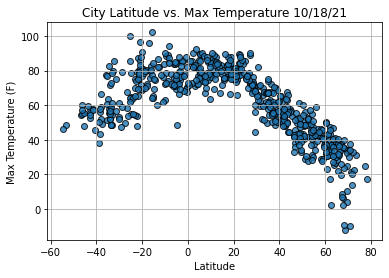

In [28]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

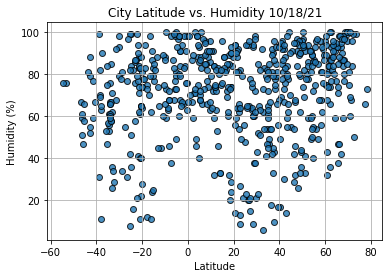

In [29]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

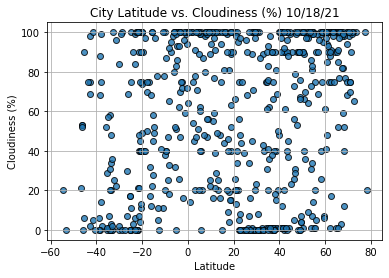

In [58]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

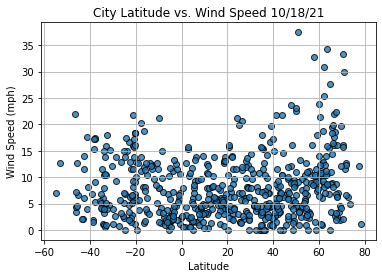

In [59]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [60]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [61]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

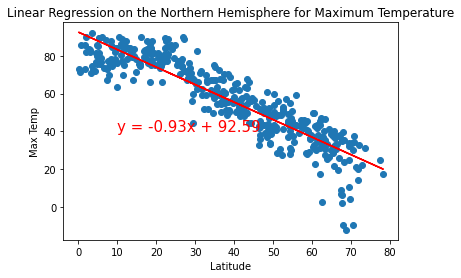

In [62]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

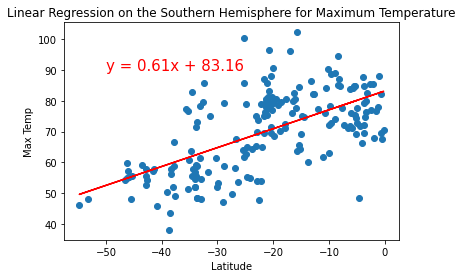

In [63]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

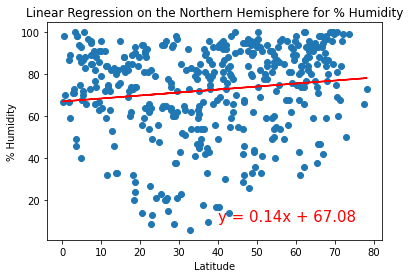

In [64]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

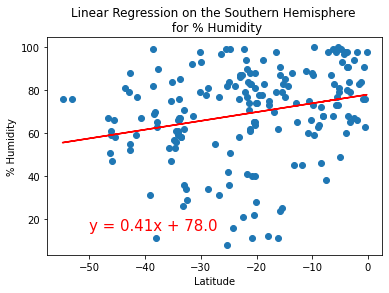

In [65]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

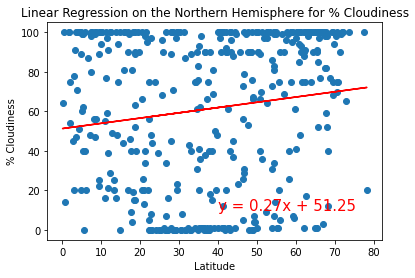

In [66]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,10))

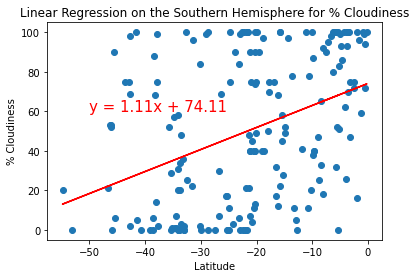

In [67]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

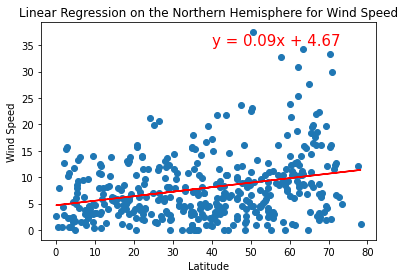

In [69]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

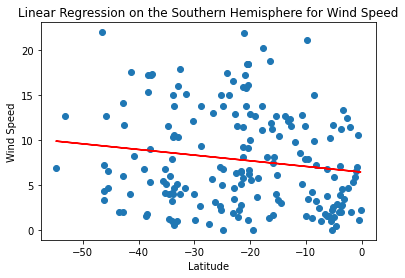

In [71]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))